C:\Users\oliwi\AppData\Local\Temp\ipykernel_10408\2825594769.py:93: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colormap = cm.get_cmap('Set2', np.max(edge_weights))
C:\Users\oliwi\AppData\Local\Temp\ipykernel_10408\2825594769.py:98: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(


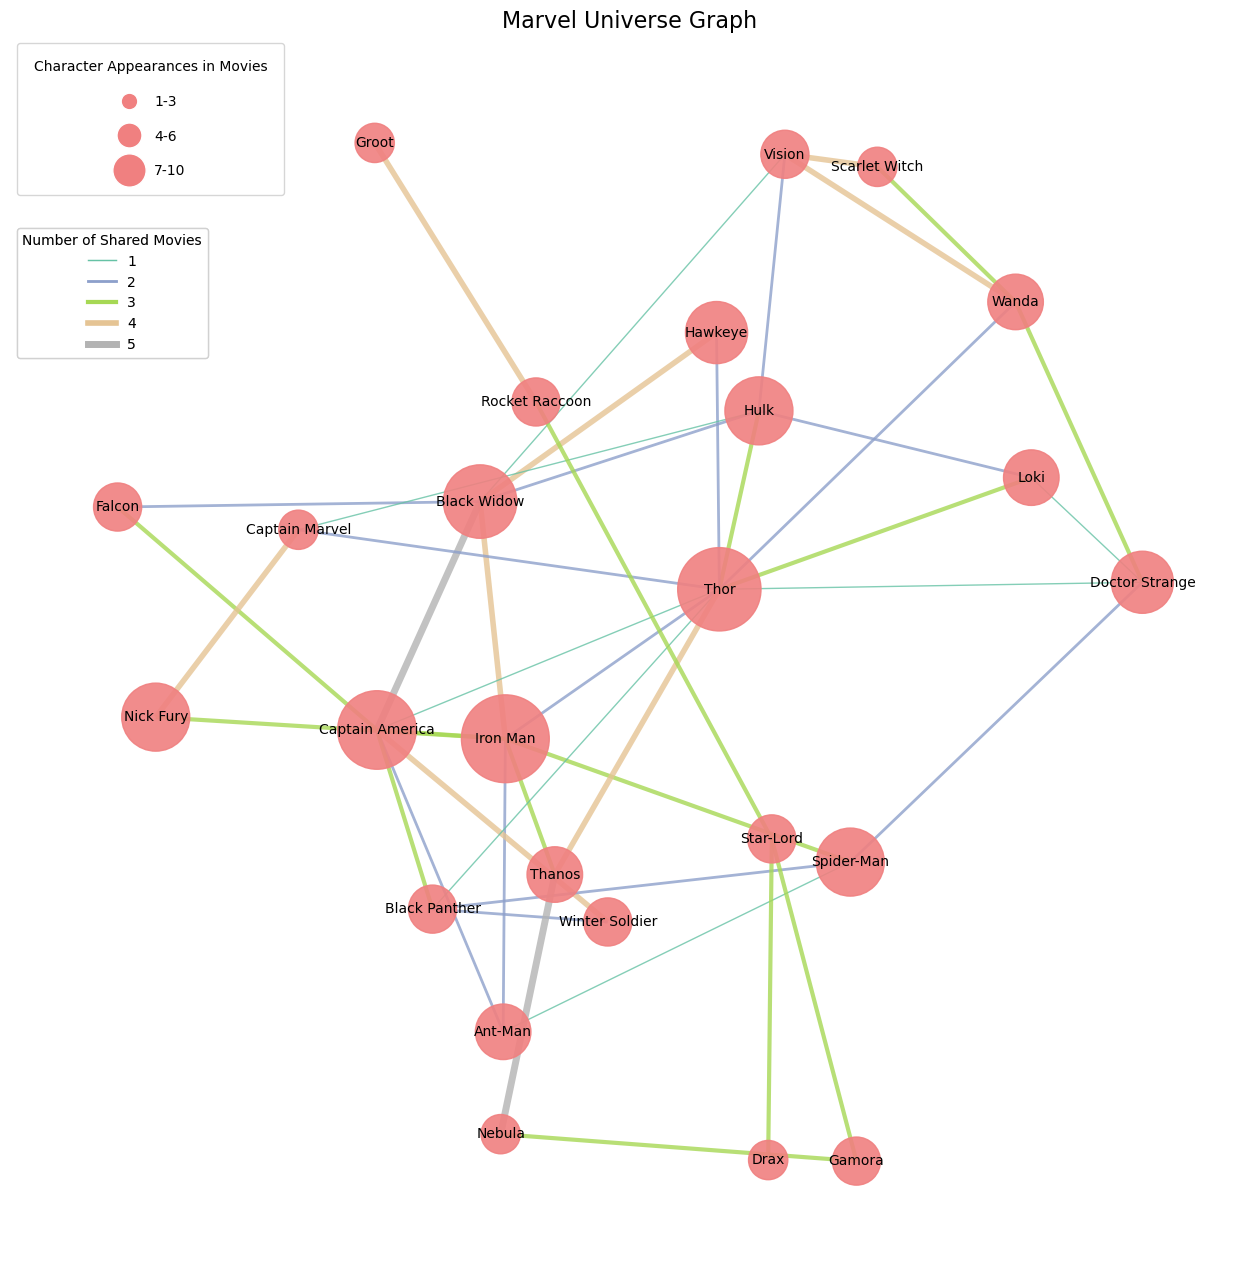

In [4]:
import networkx as nx
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import matplotlib.cm as cm
import numpy as np

connections = {
    ('Iron Man', 'Captain America'): 3,
    ('Iron Man', 'Thor'): 2,
    ('Iron Man', 'Black Widow'): 4,
    ('Captain America', 'Thor'): 1,
    ('Captain America', 'Black Widow'): 5,
    ('Thor', 'Hulk'): 3,
    ('Black Widow', 'Hawkeye'): 4,
    ('Hulk', 'Black Widow'): 2,
    ('Hawkeye', 'Thor'): 2,
    ('Spider-Man', 'Iron Man'): 3,
    ('Spider-Man', 'Doctor Strange'): 2,
    ('Doctor Strange', 'Wanda'): 3,
    ('Wanda', 'Vision'): 4,
    ('Vision', 'Hulk'): 2,
    ('Vision', 'Black Widow'): 1,
    ('Ant-Man', 'Iron Man'): 2,
    ('Ant-Man', 'Captain America'): 2,
    ('Ant-Man', 'Spider-Man'): 1,
    ('Black Panther', 'Captain America'): 3,
    ('Black Panther', 'Thor'): 1,
    ('Black Panther', 'Spider-Man'): 2,
    ('Doctor Strange', 'Thor'): 1,
    ('Wanda', 'Thor'): 2,
    ('Loki', 'Thor'): 3,
    ('Loki', 'Hulk'): 2,
    ('Loki', 'Doctor Strange'): 1,
    ('Falcon', 'Captain America'): 3,
    ('Falcon', 'Black Widow'): 2,
    ('Winter Soldier', 'Captain America'): 4,
    ('Winter Soldier', 'Black Panther'): 2,
    ('Scarlet Witch', 'Vision'): 4,
    ('Scarlet Witch', 'Wanda'): 3,
    ('Nick Fury', 'Iron Man'): 3,
    ('Nick Fury', 'Captain Marvel'): 4,
    ('Captain Marvel', 'Thor'): 2,
    ('Captain Marvel', 'Hulk'): 1,
    ('Star-Lord', 'Gamora'): 3,
    ('Star-Lord', 'Drax'): 3,
    ('Star-Lord', 'Rocket Raccoon'): 3,
    ('Rocket Raccoon', 'Groot'): 4,
    ('Gamora', 'Nebula'): 3,
    ('Nebula', 'Thanos'): 5,
    ('Thanos', 'Iron Man'): 3,
    ('Thanos', 'Thor'): 4
}

character_appearances = {
    'Iron Man': 10,
    'Captain America': 8,
    'Thor': 9,
    'Black Widow': 7,
    'Hulk': 6,
    'Hawkeye': 5,
    'Spider-Man': 6,
    'Doctor Strange': 5,
    'Wanda': 4,
    'Vision': 3,
    'Ant-Man': 4,
    'Black Panther': 3,
    'Loki': 4,
    'Falcon': 3,
    'Winter Soldier': 3,
    'Scarlet Witch': 2,
    'Nick Fury': 6,
    'Captain Marvel': 2,
    'Star-Lord': 3,
    'Gamora': 3,
    'Drax': 2,
    'Rocket Raccoon': 3,
    'Groot': 2,
    'Nebula': 2,
    'Thanos': 4
}

G = nx.Graph()
for (character1, character2), weight in connections.items():
    G.add_edge(character1, character2, weight=weight)

pos = nx.spring_layout(G, seed=52, k=1.2, weight='weight')

plt.figure(figsize=(16, 16))
edges = G.edges(data=True)

# Generate distinct and visible colors for edges based on their weights
edge_weights = np.array([d['weight'] for _, _, d in edges])
colormap = cm.get_cmap('Set2', np.max(edge_weights))
edge_colors = [colormap(weight - 1) for weight in edge_weights]


# Draw edges with vibrant colors
nx.draw_networkx_edges(
    G, pos,
    edgelist=[(u, v) for u, v, d in edges],
    width=edge_weights,
    edge_color=edge_colors,
    alpha=0.8
)

# Node sizes based on character appearances
scale_factor = 400
node_sizes = [character_appearances.get(node, 0) * scale_factor for node in G.nodes()]

# Draw nodes in red
nx.draw_networkx_nodes(G, pos, node_color='lightcoral', node_size=node_sizes, alpha=0.9)

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=10, font_color='black')

# Legends
node_legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral', markersize=12, label='1-3'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral', markersize=18, label='4-6'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor='lightcoral', markersize=24, label='7-10')
]
node_legend = plt.legend(
    handles=node_legend_elements,
    loc='upper left',
    fontsize=10,
    title="Character Appearances in Movies",
    labelspacing=1.5,
    borderpad=1.2
)
plt.gca().add_artist(node_legend)

edge_legend_elements = [
    Line2D([0], [0], color=colormap(0), lw=1, label='1'),
    Line2D([0], [0], color=colormap(1), lw=2, label='2'),
    Line2D([0], [0], color=colormap(2), lw=3, label='3'),
    Line2D([0], [0], color=colormap(3), lw=4, label='4'),
    Line2D([0], [0], color=colormap(4), lw=5, label='5')
]

edge_legend = plt.legend(
    handles=edge_legend_elements,
    loc='upper left',
    bbox_to_anchor=(0, 0.85),
    fontsize=10,
    title="Number of Shared Movies"
)
plt.gca().add_artist(edge_legend)

plt.title("Marvel Universe Graph", fontsize=16)
plt.axis('off')
plt.show()
